# Importing Libraries  

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
from sklearn import linear_model
import pickle 

# Reading and Analysing Dataset

In [3]:
raw_df = pd.read_csv('seattle-weather.csv')
raw_df

,date,precipitation,temp_max,temp_min,wind
0,1/1/2012,0.0,12.8,5.0,4.7
1,1/2/2012,10.9,10.6,2.8,4.5
2,1/3/2012,0.8,11.7,7.2,2.3
3,1/4/2012,20.3,12.2,5.6,4.7
4,1/5/2012,1.3,8.9,2.8,6.1
...,...,...,...,...,...
1456,12/27/2015,8.6,4.4,1.7,2.9
1457,12/28/2015,1.5,5.0,1.7,1.3
1458,12/29/2015,0.0,7.2,0.6,2.6
1459,12/30/2015,0.0,5.6,-1.0,3.4


In [4]:
df_info = raw_df.info()
df_info


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           1461 non-null   object 
 1   precipitation  1461 non-null   float64
 2   temp_max       1461 non-null   float64
 3   temp_min       1461 non-null   float64
 4   wind           1461 non-null   float64
dtypes: float64(4), object(1)
memory usage: 57.2+ KB


In [5]:
df_tail = raw_df.tail()
df_tail

,date,precipitation,temp_max,temp_min,wind
1456,12/27/2015,8.6,4.4,1.7,2.9
1457,12/28/2015,1.5,5.0,1.7,1.3
1458,12/29/2015,0.0,7.2,0.6,2.6
1459,12/30/2015,0.0,5.6,-1.0,3.4
1460,12/31/2015,0.0,5.6,-2.1,3.5


In [6]:
df_describe = raw_df.describe()
df_describe


,precipitation,temp_max,temp_min,wind
count,1461.000000,1461.000000,1461.000000,1461.000000
mean,3.029432,16.439083,8.234771,3.241136
std,6.680194,7.349758,5.023004,1.437825
min,0.000000,-1.600000,-7.100000,0.400000
25%,0.000000,10.600000,4.400000,2.200000
50%,0.000000,15.600000,8.300000,3.000000
75%,2.800000,22.200000,12.200000,4.000000
max,55.900000,35.600000,18.300000,9.500000


In [7]:
df_shape = raw_df.shape
print('The dataset in rows and columns =', df_shape)

The dataset in rows and columns = (1461, 5)


In [8]:
df = raw_df.drop(columns =['date', 'precipitation','temp_min'])
df

,temp_max,wind
0,12.8,4.7
1,10.6,4.5
2,11.7,2.3
3,12.2,4.7
4,8.9,6.1
...,...,...
1456,4.4,2.9
1457,5.0,1.3
1458,7.2,2.6
1459,5.6,3.4


In [9]:
df = df.rename(columns={'temp_max': 'temperature'}, inplace=False)
df.head()

,temperature,wind
0,12.8,4.7
1,10.6,4.5
2,11.7,2.3
3,12.2,4.7
4,8.9,6.1


In [10]:
desired_order = ['wind', 'temperature']
df = df[desired_order]
df.head()

,wind,temperature
0,4.7,12.8
1,4.5,10.6
2,2.3,11.7
3,4.7,12.2
4,6.1,8.9


# Visualizing Data 

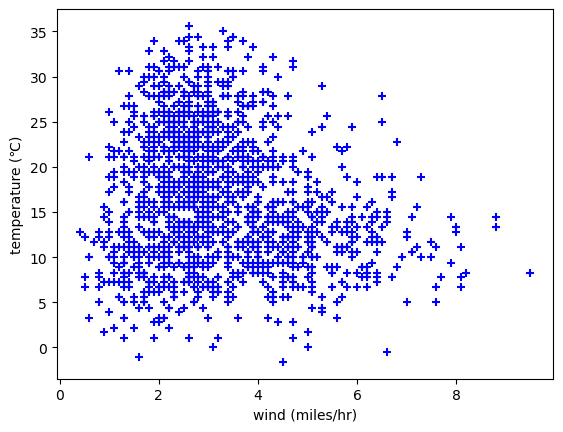

In [11]:
%matplotlib inline
plt.xlabel('wind (miles/hr)')
plt.ylabel('temperature (℃)')
plt.scatter(df.wind, df.temperature, color='blue', marker='+')

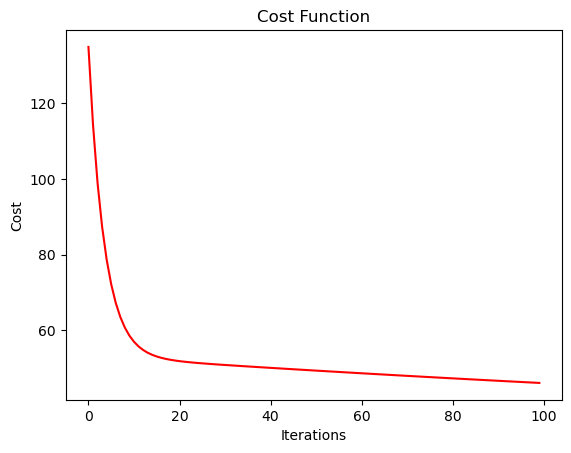

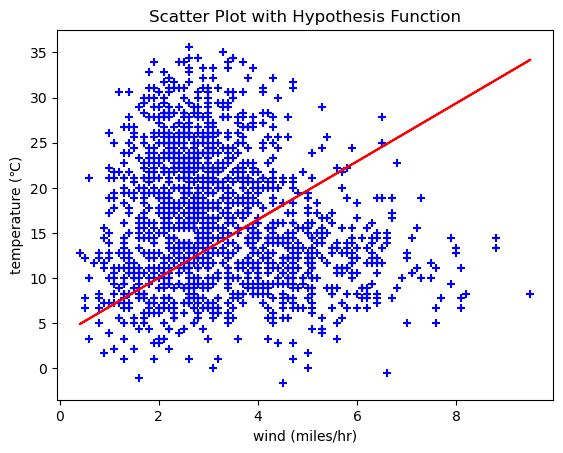

In [12]:
def hypothesis(theta0, theta1, X):
    return theta0 + theta1 * X


def cost_function(theta0, theta1, X, y):
    m = len(X)
    predictions = hypothesis(theta0, theta1, X)
    cost = (1/(2*m)) * np.sum((predictions - y)**2)
    return cost

def gradient_descent(X, y, learning_rate=0.01, iterations=100):
    m = len(X)
    theta0 = 0
    theta1 = 0
    costs = []
    for _ in range(iterations):
        predictions = hypothesis(theta0, theta1, X)
        error = predictions - y
        theta0 -= learning_rate * (1/m) * np.sum(error)
        theta1 -= learning_rate * (1/m) * np.sum(error * X)
        costs.append(cost_function(theta0, theta1, X, y))
    return theta0, theta1, costs


theta0, theta1, costs = gradient_descent(df['wind'], df['temperature'])

plt.plot(costs, color='red') 
plt.title('Cost Function')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()

plt.scatter(df['wind'], df['temperature'], color='blue', marker='+') 
plt.plot(df['wind'], hypothesis(theta0, theta1, df['wind']), color='red')  
plt.title('Scatter Plot with Hypothesis Function')
plt.xlabel('wind (miles/hr)')
plt.ylabel('temperature (℃)')
plt.show()


# Creating and Training Model 

In [13]:
model = linear_model.LinearRegression()
model.fit(df[['wind']], df.temperature)

LinearRegression()

# Model Prediction 

In [14]:
wind = float(input('wind speed: '))
wind_input = np.array(wind).reshape(1, -1)
predicted_temp = model.predict(wind_input)
predicted_temp = round(predicted_temp[0], 2)
print('When the wind speed is', wind,'miles/hr, the predicted temperature is', predicted_temp, '℃')


wind speed:  5


When the wind speed is 5.0 miles/hr, the predicted temperature is 14.96 ℃


C:\Users\chukw\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
